# Classificação de tweets

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns

import string
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn import svm
from statistics import mean


from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from collections import Counter
from sklearn.datasets import make_classification

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [12, 7]

In [23]:
import warnings
warnings.filterwarnings('ignore')

# Metodologia utilizada neste notebook

Neste notebook, está o passo a passo dos testes realizados com classificadores na base de tweets coletados relacionados aos candidatos à presidência da República e classificados utilizando o CLAM.


## Limpeza do corpus

Método para remoção de emojis dos tweets e importação do arquivo de stopwords.

In [3]:
emojistring = '''😀 😁 😂 🤣 😃 😄 😅 😆 😉 😊 😋 😎 😍 😘 😗 😙 😚 ☺️ 🙂 🤗 🤩 🤔 🤨 😐 😑 😶 🙄 😏 😣 😥 😮 🤐 😯 😪 😫 😴 😌 😛 😜 😝 🤤 😒 😓 😔 😕 🙃 🤑 😲 ☹️ 🙁 😖 😞 😟 😤 😢 😭 😦 😧 😨 😩 🤯 😬 😰 😱 😳 🤪 😵 😡 😠 🤬 😷 🤒 🤕 🤢 🤮 🤧 😇 🤠 🤡 🤥 🤫 🤭 🧐 🤓 😈 👿 👹 👺 💀 👻 👽 🤖 💩 😺 😸 😹 😻 😼 😽 🙀 😿 😾
👶 👦 👧 👨 👩 👴 👵 👨‍⚕️ 👩‍⚕️ 👨‍🎓 👩‍🎓 👨‍⚖️ 👩‍⚖️ 👨‍🌾 👩‍🌾 👨‍🍳 👩‍🍳 👨‍🔧 👩‍🔧 👨‍🏭 👩‍🏭 👨‍💼 👩‍💼 👨‍🔬 👩‍🔬 👨‍💻 👩‍💻 👨‍🎤 👩‍🎤 👨‍🎨 👩‍🎨 👨‍✈️ 👩‍✈️ 👨‍🚀 👩‍🚀 👨‍🚒 👩‍🚒 👮 👮‍♂️ 👮‍♀️ 🕵 🕵️‍♂️ 🕵️‍♀️ 💂 💂‍♂️ 💂‍♀️ 👷 👷‍♂️ 👷‍♀️ 🤴 👸 👳 👳‍♂️ 👳‍♀️ 👲 🧕 🧔 👱 👱‍♂️ 👱‍♀️ 🤵 👰 🤰 🤱 👼 🎅 🤶 🧙‍♀️ 🧙‍♂️ 🧚‍♀️ 🧚‍♂️ 🧛‍♀️ 🧛‍♂️ 🧜‍♀️ 🧜‍♂️ 🧝‍♀️ 🧝‍♂️ 🧞‍♀️ 🧞‍♂️ 🧟‍♀️ 🧟‍♂️ 🙍 🙍‍♂️ 🙍‍♀️ 🙎 🙎‍♂️ 🙎‍♀️ 🙅 🙅‍♂️ 🙅‍♀️ 🙆 🙆‍♂️ 🙆‍♀️ 💁 💁‍♂️ 💁‍♀️ 🙋 🙋‍♂️ 🙋‍♀️ 🙇 🙇‍♂️ 🙇‍♀️ 🤦 🤦‍♂️ 🤦‍♀️ 🤷 🤷‍♂️ 🤷‍♀️ 💆 💆‍♂️ 💆‍♀️ 💇 💇‍♂️ 💇‍♀️ 🚶 🚶‍♂️ 🚶‍♀️ 🏃 🏃‍♂️ 🏃‍♀️ 💃 🕺 👯 👯‍♂️ 👯‍♀️ 🧖‍♀️ 🧖‍♂️ 🕴 🗣 👤 👥 👫 👬 👭 💏 👨‍❤️‍💋‍👨 👩‍❤️‍💋‍👩 💑 👨‍❤️‍👨 👩‍❤️‍👩 👪 👨‍👩‍👦 👨‍👩‍👧 👨‍👩‍👧‍👦 👨‍👩‍👦‍👦 👨‍👩‍👧‍👧 👨‍👨‍👦 👨‍👨‍👧 👨‍👨‍👧‍👦 👨‍👨‍👦‍👦 👨‍👨‍👧‍👧 👩‍👩‍👦 👩‍👩‍👧 👩‍👩‍👧‍👦 👩‍👩‍👦‍👦 👩‍👩‍👧‍👧 👨‍👦 👨‍👦‍👦 👨‍👧 👨‍👧‍👦 👨‍👧‍👧 👩‍👦 👩‍👦‍👦 👩‍👧 👩‍👧‍👦 👩‍👧‍👧 🤳 💪 👈 👉 ☝️ 👆 🖕 👇 ✌️ 🤞 🖖 🤘 🖐 ✋ 👌 👍 👎 ✊ 👊 🤛 🤜 🤚 👋 🤟 ✍️ 👏 👐 🙌 🤲 🙏 🤝 💅 👂 👃 👣 👀 👁 🧠 👅 👄 💋

👓 🕶 👔 👕 👖 🧣 🧤 🧥 🧦 👗 👘 👙 👚 👛 👜 👝 🎒 👞 👟 👠 👡 👢 👑 👒 🎩 🎓 🧢 ⛑ 💄 💍 🌂 💼
👐🏻 🙌🏻 👏🏻 🙏🏻 👍🏻 👎🏻 👊🏻 ✊🏻 🤛🏻 🤜🏻 🤞🏻 ✌🏻 🤘🏻 👌🏻 👈🏻 👉🏻 👆🏻 👇🏻 ☝🏻 ✋🏻 🤚🏻 🖐🏻 🖖🏻 👋🏻 🤙🏻 💪🏻 🖕🏻 ✍🏻 🤳🏻 💅🏻 👂🏻 👃🏻 👶🏻 👦🏻 👧🏻 👨🏻 👩🏻 👱🏻‍♀️ 👱🏻 👴🏻 👵🏻 👲🏻 👳🏻‍♀️ 👳🏻 👮🏻‍♀️ 👮🏻 👷🏻‍♀️ 👷🏻 💂🏻‍♀️ 💂🏻 🕵🏻‍♀️ 🕵🏻 👩🏻‍⚕️ 👨🏻‍⚕️ 👩🏻‍🌾 👨🏻‍🌾 👩🏻‍🍳 👨🏻‍🍳 👩🏻‍🎓 👨🏻‍🎓 👩🏻‍🎤 👨🏻‍🎤 👩🏻‍🏫 👨🏻‍🏫 👩🏻‍🏭 👨🏻‍🏭 👩🏻‍💻 👨🏻‍💻 👩🏻‍💼 👨🏻‍💼 👩🏻‍🔧 👨🏻‍🔧 👩🏻‍🔬 👨🏻‍🔬 👩🏻‍🎨 👨🏻‍🎨 👩🏻‍🚒 👨🏻‍🚒 👩🏻‍✈️ 👨🏻‍✈️ 👩🏻‍🚀 👨🏻‍🚀 👩🏻‍⚖️ 👨🏻‍⚖️ 🤶🏻 🎅🏻 👸🏻 🤴🏻 👰🏻 🤵🏻 👼🏻 🤰🏻 🙇🏻‍♀️ 🙇🏻 💁🏻 💁🏻‍♂️ 🙅🏻 🙅🏻‍♂️ 🙆🏻 🙆🏻‍♂️ 🙋🏻 🙋🏻‍♂️ 🤦🏻‍♀️ 🤦🏻‍♂️ 🤷🏻‍♀️ 🤷🏻‍♂️ 🙎🏻 🙎🏻‍♂️ 🙍🏻 🙍🏻‍♂️ 💇🏻 💇🏻‍♂️ 💆🏻 💆🏻‍♂️ 🕴🏻 💃🏻 🕺🏻 🚶🏻‍♀️ 🚶🏻 🏃🏻‍♀️ 🏃🏻 🏋🏻‍♀️ 🏋🏻 🤸🏻‍♀️ 🤸🏻‍♂️ ⛹🏻‍♀️ ⛹🏻 🤾🏻‍♀️ 🤾🏻‍♂️ 🏌🏻‍♀️ 🏌🏻 🏄🏻‍♀️ 🏄🏻 🏊🏻‍♀️ 🏊🏻 🤽🏻‍♀️ 🤽🏻‍♂️ 🚣🏻‍♀️ 🚣🏻 🏇🏻 🚴🏻‍♀️ 🚴🏻 🚵🏻‍♀️ 🚵🏻 🤹🏻‍♀️ 🤹🏻‍♂️ 🛀🏻

👐🏼 🙌🏼 👏🏼 🙏🏼 👍🏼 👎🏼 👊🏼 ✊🏼 🤛🏼 🤜🏼 🤞🏼 ✌🏼 🤘🏼 👌🏼 👈🏼 👉🏼 👆🏼 👇🏼 ☝🏼 ✋🏼 🤚🏼 🖐🏼 🖖🏼 👋🏼 🤙🏼 💪🏼 🖕🏼 ✍🏼 🤳🏼 💅🏼 👂🏼 👃🏼 👶🏼 👦🏼 👧🏼 👨🏼 👩🏼 👱🏼‍♀️ 👱🏼 👴🏼 👵🏼 👲🏼 👳🏼‍♀️ 👳🏼 👮🏼‍♀️ 👮🏼 👷🏼‍♀️ 👷🏼 💂🏼‍♀️ 💂🏼 🕵🏼‍♀️ 🕵🏼 👩🏼‍⚕️ 👨🏼‍⚕️ 👩🏼‍🌾 👨🏼‍🌾 👩🏼‍🍳 👨🏼‍🍳 👩🏼‍🎓 👨🏼‍🎓 👩🏼‍🎤 👨🏼‍🎤 👩🏼‍🏫 👨🏼‍🏫 👩🏼‍🏭 👨🏼‍🏭 👩🏼‍💻 👨🏼‍💻 👩🏼‍💼 👨🏼‍💼 👩🏼‍🔧 👨🏼‍🔧 👩🏼‍🔬 👨🏼‍🔬 👩🏼‍🎨 👨🏼‍🎨 👩🏼‍🚒 👨🏼‍🚒 👩🏼‍✈️ 👨🏼‍✈️ 👩🏼‍🚀 👨🏼‍🚀 👩🏼‍⚖️ 👨🏼‍⚖️ 🤶🏼 🎅🏼 👸🏼 🤴🏼 👰🏼 🤵🏼 👼🏼 🤰🏼 🙇🏼‍♀️ 🙇🏼 💁🏼 💁🏼‍♂️ 🙅🏼 🙅🏼‍♂️ 🙆🏼 🙆🏼‍♂️ 🙋🏼 🙋🏼‍♂️ 🤦🏼‍♀️ 🤦🏼‍♂️ 🤷🏼‍♀️ 🤷🏼‍♂️ 🙎🏼 🙎🏼‍♂️ 🙍🏼 🙍🏼‍♂️ 💇🏼 💇🏼‍♂️ 💆🏼 💆🏼‍♂️ 🕴🏼 💃🏼 🕺🏼 🚶🏼‍♀️ 🚶🏼 🏃🏼‍♀️ 🏃🏼 🏋🏼‍♀️ 🏋🏼 🤸🏼‍♀️ 🤸🏼‍♂️ ⛹🏼‍♀️ ⛹🏼 🤾🏼‍♀️ 🤾🏼‍♂️ 🏌🏼‍♀️ 🏌🏼 🏄🏼‍♀️ 🏄🏼 🏊🏼‍♀️ 🏊🏼 🤽🏼‍♀️ 🤽🏼‍♂️ 🚣🏼‍♀️ 🚣🏼 🏇🏼 🚴🏼‍♀️ 🚴🏼 🚵🏼‍♀️ 🚵🏻 🤹🏼‍♀️ 🤹🏼‍♂️ 🛀🏼

👐🏽 🙌🏽 👏🏽 🙏🏽 👍🏽 👎🏽 👊🏽 ✊🏽 🤛🏽 🤜🏽 🤞🏽 ✌🏽 🤘🏽 👌🏽 👈🏽 👉🏽 👆🏽 👇🏽 ☝🏽 ✋🏽 🤚🏽 🖐🏽 🖖🏽 👋🏽 🤙🏽 💪🏽 🖕🏽 ✍🏽 🤳🏽 💅🏽 👂🏽 👃🏽 👶🏽 👦🏽 👧🏽 👨🏽 👩🏽 👱🏽‍♀️ 👱🏽 👴🏽 👵🏽 👲🏽 👳🏽‍♀️ 👳🏽 👮🏽‍♀️ 👮🏽 👷🏽‍♀️ 👷🏽 💂🏽‍♀️ 💂🏽 🕵🏽‍♀️ 🕵🏽 👩🏽‍⚕️ 👨🏽‍⚕️ 👩🏽‍🌾 👨🏽‍🌾 👩🏽‍🍳 👨🏽‍🍳 👩🏽‍🎓 👨🏽‍🎓 👩🏽‍🎤 👨🏽‍🎤 👩🏽‍🏫 👨🏽‍🏫 👩🏽‍🏭 👨🏽‍🏭 👩🏽‍💻 👨🏽‍💻 👩🏽‍💼 👨🏽‍💼 👩🏽‍🔧 👨🏽‍🔧 👩🏽‍🔬 👨🏽‍🔬 👩🏽‍🎨 👨🏽‍🎨 👩🏽‍🚒 👨🏽‍🚒 👩🏽‍✈️ 👨🏽‍✈️ 👩🏽‍🚀 👨🏽‍🚀 👩🏽‍⚖️ 👨🏽‍⚖️ 🤶🏽 🎅🏽 👸🏽 🤴🏽 👰🏽 🤵🏽 👼🏽 🤰🏽 🙇🏽‍♀️ 🙇🏽 💁🏽 💁🏽‍♂️ 🙅🏽 🙅🏽‍♂️ 🙆🏽 🙆🏽‍♂️ 🙋🏽 🙋🏽‍♂️ 🤦🏽‍♀️ 🤦🏽‍♂️ 🤷🏽‍♀️ 🤷🏽‍♂️ 🙎🏽 🙎🏽‍♂️ 🙍🏽 🙍🏽‍♂️ 💇🏽 💇🏽‍♂️ 💆🏽 💆🏽‍♂️ 🕴🏼 💃🏽 🕺🏽 🚶🏽‍♀️ 🚶🏽 🏃🏽‍♀️ 🏃🏽 🏋🏽‍♀️ 🏋🏽 🤸🏽‍♀️ 🤸🏽‍♂️ ⛹🏽‍♀️ ⛹🏽 🤾🏽‍♀️ 🤾🏽‍♂️ 🏌🏽‍♀️ 🏌🏽 🏄🏽‍♀️ 🏄🏽 🏊🏽‍♀️ 🏊🏽 🤽🏽‍♀️ 🤽🏽‍♂️ 🚣🏽‍♀️ 🚣🏽 🏇🏽 🚴🏽‍♀️ 🚴🏽 🚵🏽‍♀️ 🚵🏽 🤹🏽‍♀️ 🤹🏽‍♂️ 🛀🏽

👐🏾 🙌🏾 👏🏾 🙏🏾 👍🏾 👎🏾 👊🏾 ✊🏾 🤛🏾 🤜🏾 🤞🏾 ✌🏾 🤘🏾 👌🏾 👈🏾 👉🏾 👆🏾 👇🏾 ☝🏾 ✋🏾 🤚🏾 🖐🏾 🖖🏾 👋🏾 🤙🏾 💪🏾 🖕🏾 ✍🏾 🤳🏾 💅🏾 👂🏾 👃🏾 👶🏾 👦🏾 👧🏾 👨🏾 👩🏾 👱🏾‍♀️ 👱🏾 👴🏾 👵🏾 👲🏾 👳🏾‍♀️ 👳🏾 👮🏾‍♀️ 👮🏾 👷🏾‍♀️ 👷🏾 💂🏾‍♀️ 💂🏾 🕵🏾‍♀️ 🕵🏾 👩🏾‍⚕️ 👨🏾‍⚕️ 👩🏾‍🌾 👨🏾‍🌾 👩🏾‍🍳 👨🏾‍🍳 👩🏾‍🎓 👨🏾‍🎓 👩🏾‍🎤 👨🏾‍🎤 👩🏾‍🏫 👨🏾‍🏫 👩🏾‍🏭 👨🏾‍🏭 👩🏾‍💻 👨🏾‍💻 👩🏾‍💼 👨🏾‍💼 👩🏾‍🔧 👨🏾‍🔧 👩🏾‍🔬 👨🏾‍🔬 👩🏾‍🎨 👨🏾‍🎨 👩🏾‍🚒 👨🏾‍🚒 👩🏾‍✈️ 👨🏾‍✈️ 👩🏾‍🚀 👨🏾‍🚀 👩🏾‍⚖️ 👨🏾‍⚖️ 🤶🏾 🎅🏾 👸🏾 🤴🏾 👰🏾 🤵🏾 👼🏾 🤰🏾 🙇🏾‍♀️ 🙇🏾 💁🏾 💁🏾‍♂️ 🙅🏾 🙅🏾‍♂️ 🙆🏾 🙆🏾‍♂️ 🙋🏾 🙋🏾‍♂️ 🤦🏾‍♀️ 🤦🏾‍♂️ 🤷🏾‍♀️ 🤷🏾‍♂️ 🙎🏾 🙎🏾‍♂️ 🙍🏾 🙍🏾‍♂️ 💇🏾 💇🏾‍♂️ 💆🏾 💆🏾‍♂️ 🕴🏾 💃🏾 🕺🏾 🚶🏾‍♀️ 🚶🏾 🏃🏾‍♀️ 🏃🏾 🏋🏾‍♀️ 🏋🏾 🤸🏾‍♀️ 🤸🏾‍♂️ ⛹🏾‍♀️ ⛹🏾 🤾🏾‍♀️ 🤾🏾‍♂️ 🏌🏾‍♀️ 🏌🏾 🏄🏾‍♀️ 🏄🏾 🏊🏾‍♀️ 🏊🏾 🤽🏾‍♀️ 🤽🏾‍♂️ 🚣🏾‍♀️ 🚣🏾 🏇🏾 🚴🏾‍♀️ 🚴🏾 🚵🏾‍♀️ 🚵🏾 🤹🏾‍♀️ 🤹🏾‍♂️ 🛀🏾

👐🏿 🙌🏿 👏🏿 🙏🏿 👍🏿 👎🏿 👊🏿 ✊🏿 🤛🏿 🤜🏿 🤞🏿 ✌🏿 🤘🏿 👌🏿 👈🏿 👉🏿 👆🏿 👇🏿 ☝🏿 ✋🏿 🤚🏿 🖐🏿 🖖🏿 👋🏿 🤙🏿 💪🏿 🖕🏿 ✍🏿 🤳🏿 💅🏿 👂🏿 👃🏿 👶🏿 👦🏿 👧🏿 👨🏿 👩🏿 👱🏿‍♀️ 👱🏿 👴🏿 👵🏿 👲🏿 👳🏿‍♀️ 👳🏿 👮🏿‍♀️ 👮🏿 👷🏿‍♀️ 👷🏿 💂🏿‍♀️ 💂🏿 🕵🏿‍♀️ 🕵🏿 👩🏿‍⚕️ 👨🏿‍⚕️ 👩🏿‍🌾 👨🏿‍🌾 👩🏿‍🍳 👨🏿‍🍳 👩🏿‍🎓 👨🏿‍🎓 👩🏿‍🎤 👨🏿‍🎤 👩🏿‍🏫 👨🏿‍🏫 👩🏿‍🏭 👨🏿‍🏭 👩🏿‍💻 👨🏿‍💻 👩🏿‍💼 👨🏿‍💼 👩🏿‍🔧 👨🏿‍🔧 👩🏿‍🔬 👨🏿‍🔬 👩🏿‍🎨 👨🏿‍🎨 👩🏿‍🚒 👨🏿‍🚒 👩🏿‍✈️ 👨🏿‍✈️ 👩🏿‍🚀 👨🏿‍🚀 👩🏿‍⚖️ 👨🏿‍⚖️ 🤶🏿 🎅🏿 👸🏿 🤴🏿 👰🏿 🤵🏿 👼🏿 🤰🏿 🙇🏿‍♀️ 🙇🏿 💁🏿 💁🏿‍♂️ 🙅🏿 🙅🏿‍♂️ 🙆🏿 🙆🏿‍♂️ 🙋🏿 🙋🏿‍♂️ 🤦🏿‍♀️ 🤦🏿‍♂️ 🤷🏿‍♀️ 🤷🏿‍♂️ 🙎🏿 🙎🏿‍♂️ 🙍🏿 🙍🏿‍♂️ 💇🏿 💇🏿‍♂️ 💆🏿 💆🏿‍♂️ 🕴🏿 💃🏿 🕺🏿 🚶🏿‍♀️ 🚶🏿 🏃🏿‍♀️ 🏃🏿 🏋🏿‍♀️ 🏋🏿 🤸🏿‍♀️ 🤸🏿‍♂️ ⛹🏿‍♀️ ⛹🏿 🤾🏿‍♀️ 🤾🏿‍♂️ 🏌🏿‍♀️ 🏌🏿 🏄🏿‍♀️ 🏄🏿 🏊🏿‍♀️ 🏊🏿 🤽🏿‍♀️ 🤽🏿‍♂️ 🚣🏿‍♀️ 🚣🏿 🏇🏿 🚴🏿‍♀️ 🚴🏿 🚵🏿‍♀️ 🚵🏿 🤹🏿‍♀️ 🤹🏿‍♂️ 🛀🏿

🐶 🐱 🐭 🐹 🐰 🦊 🐻 🐼 🐨 🐯 🦁 🐮 🐷 🐽 🐸 🐵 🙊 🙉 🙊 🐒 🐔 🐧 🐦 🐤 🐣 🐥 🦆 🦅 🦉 🦇 🐺 🐗 🐴 🦄 🐝 🐛 🦋 🐌 🐚 🐞 🐜 🕷 🕸 🐢 🐍 🦎 🦂 🦀 🦑 🐙 🦐 🐠 🐟 🐡 🐬 🦈 🐳 🐋 🐊 🐆 🐅 🐃 🐂 🐄 🦌 🐪 🐫 🐘 🦏 🦍 🐎 🐖 🐐 🐏 🐑 🐕 🐩 🐈 🐓 🦃 🕊 🐇 🐁 🐀 🐿 🐾 🐉 🐲 🌵 🎄 🌲 🌳 🌴 🌱 🌿 ☘️ 🍀 🎍 🎋 🍃 🍂 🍁 🍄 🌾 💐 🌷 🌹 🥀 🌻 🌼 🌸 🌺 🌎 🌍 🌏 🌕 🌖 🌗 🌘 🌑 🌒 🌓 🌔 🌚 🌝 🌞 🌛 🌜 🌙 💫 ⭐️ 🌟 ✨ ⚡️ 🔥 💥 ☄️ ☀️ 🌤 ⛅️ 🌥 🌦 🌈 ☁️ 🌧 ⛈ 🌩 🌨 ☃️ ⛄️ ❄️ 🌬 💨 🌪 🌫 🌊 💧 💦 ☔️

🍏 🍎 🍐 🍊 🍋 🍌 🍉 🍇 🍓 🍈 🍒 🍑 🍍 🥝 🥑 🍅 🍆 🥒 🥕 🌽 🌶 🥔 🍠 🌰 🥜 🍯 🥐 🍞 🥖 🧀 🥚 🍳 🥓 🥞 🍤 🍗 🍖 🍕 🌭 🍔 🍟 🥙 🌮 🌯 🥗 🥘 🍝 🍜 🍲 🍥 🍣 🍱 🍛 🍚 🍙 🍘 🍢 🍡 🍧 🍨 🍦 🍰 🎂 🍮 🍭 🍬 🍫 🍿 🍩 🍪 🥛 🍼 ☕️ 🍵 🍶 🍺 🍻 🥂 🍷 🥃 🍸 🍹 🍾 🥄 🍴 🍽

⚽️ 🏀 🏈 ⚾️ 🎾 🏐 🏉 🎱 🏓 🏸 🥅 🏒 🏑 🏏 ⛳️ 🏹 🎣 🥊 🥋 ⛸ 🎿 ⛷ 🏂 🏋️‍♀️ 🏋️ 🤺 🤼‍♀️ 🤼‍♂️ 🤸‍♀️ 🤸‍♂️ ⛹️‍♀️ ⛹️ 🤾‍♀️ 🤾‍♂️ 🏌️‍♀️ 🏌️ 🏄‍♀️ 🏄 🏊‍♀️ 🏊 🤽‍♀️ 🤽‍♂️ 🚣‍♀️ 🚣 🏇 🚴‍♀️ 🚴 🚵‍♀️ 🚵 🎽 🏅 🎖 🥇 🥈 🥉 🏆 🏵 🎗 🎫 🎟 🎪 🤹‍♀️ 🤹‍♂️ 🎭 🎨 🎬 🎤 🎧 🎼 🎹 🥁 🎷 🎺 🎸 🎻 🎲 🎯 🎳 🎮 🎰

🚗 🚕 🚙 🚌 🚎 🏎 🚓 🚑 🚒 🚐 🚚 🚛 🚜 🛴 🚲 🛵 🏍 🚨 🚔 🚍 🚘 🚖 🚡 🚠 🚟 🚃 🚋 🚞 🚝 🚄 🚅 🚈 🚂 🚆 🚇 🚊 🚉 🚁 🛩 ✈️ 🛫 🛬 🚀 🛰 💺 🛶 ⛵️ 🛥 🚤 🛳 ⛴ 🚢 ⚓️ 🚧 ⛽️ 🚏 🚦 🚥 🗺 🗿 🗽 ⛲️ 🗼 🏰 🏯 🏟 🎡 🎢 🎠 ⛱ 🏖 🏝 ⛰ 🏔 🗻 🌋 🏜 🏕 ⛺️ 🛤 🛣 🏗 🏭 🏠 🏡 🏘 🏚 🏢 🏬 🏣 🏤 🏥 🏦 🏨 🏪 🏫 🏩 💒 🏛 ⛪️ 🕌 🕍 🕋 ⛩ 🗾 🎑 🏞 🌅 🌄 🌠 🎇 🎆 🌇 🌆 🏙 🌃 🌌 🌉 🌁

⌚️ 📱 📲 💻 ⌨️ 🖥 🖨 🖱 🖲 🕹 🗜 💽 💾 💿 📀 📼 📷 📸 📹 🎥 📽 🎞 📞 ☎️ 📟 📠 📺 📻 🎙 🎚 🎛 ⏱ ⏲ ⏰ 🕰 ⌛️ ⏳ 📡 🔋 🔌 💡 🔦 🕯 🗑 🛢 💸 💵 💴 💶 💷 💰 💳 💎 ⚖️ 🔧 🔨 ⚒ 🛠 ⛏ 🔩 ⚙️ ⛓ 🔫 💣 🔪 🗡 ⚔️ 🛡 🚬 ⚰️ ⚱️ 🏺 🔮 📿 💈 ⚗️ 🔭 🔬 🕳 💊 💉 🌡 🚽 🚰 🚿 🛁 🛀 🛎 🔑 🗝 🚪 🛋 🛏 🛌 🖼 🛍 🛒 🎁 🎈 🎏 🎀 🎊 🎉 🎎 🏮 🎐 ✉️ 📩 📨 📧 💌 📥 📤 📦 🏷 📪 📫 📬 📭 📮 📯 📜 📃 📄 📑 📊 📈 📉 🗒 🗓 📆 📅 📇 🗃 🗳 🗄 📋 📁 📂 🗂 🗞 📰 📓 📔 📒 📕 📗 📘 📙 📚 📖 🔖 🔗 📎 🖇 📐 📏 📌 📍 📌 🎌 🏳️ 🏴 🏁 🏳️‍🌈 ✂️ 🖊 🖋 ✒️ 🖌 🖍 📝 ✏️ 🔍 🔎 🔏 🔐 🔒 🔓

❤️ 💛 💚 💙 💜 🖤 💔 ❣️ 💕 💞 💓 💗 💖 💘 💝 💟 ☮️ ✝️ ☪️ 🕉 ☸️ ✡️ 🔯 🕎 ☯️ ☦️ 🛐 ⛎ ♈️ ♉️ ♊️ ♋️ ♌️ ♍️ ♎️ ♏️ ♐️ ♑️ ♒️ ♓️ 🆔 ⚛️ 🉑 ☢️ ☣️ 📴 📳 🈶 🈚️ 🈸 🈺 🈷️ ✴️ 🆚 💮 🉐 ㊙️ ㊗️ 🈴 🈵 🈹 🈲 🅰️ 🅱️ 🆎 🆑 🅾️ 🆘 ❌ ⭕️ 🛑 ⛔️ 📛 🚫 💯 💢 ♨️ 🚷 🚯 🚳 🚱 🔞 📵 🚭 ❗️ ❕ ❓ ❔ ‼️ ⁉️ 🔅 🔆 〽️ ⚠️ 🚸 🔱 ⚜️ 🔰 ♻️ ✅ 🈯️ 💹 ❇️ ✳️ ❎ 🌐 💠 Ⓜ️ 🌀 💤 🏧 🚾 ♿️ 🅿️ 🈳 🈂️ 🛂 🛃 🛄 🛅 🚹 🚺 🚼 🚻 🚮 🎦 📶 🈁 🔣 ℹ️ 🔤 🔡 🔠 🆖 🆗 🆙 🆒 🆕 🆓 0️⃣ 1️⃣ 2️⃣ 3️⃣ 4️⃣ 5️⃣ 6️⃣ 7️⃣ 8️⃣ 9️⃣ 🔟 🔢 #️⃣ *️⃣ ▶️ ⏸ ⏯ ⏹ ⏺ ⏭ ⏮ ⏩ ⏪ ⏫ ⏬ ◀️ 🔼 🔽 ➡️ ⬅️ ⬆️ ⬇️ ↗️ ↘️ ↙️ ↖️ ↕️ ↔️ ↪️ ↩️ ⤴️ ⤵️ 🔀 🔁 🔂 🔄 🔃 🎵 🎶 ➕ ➖ ➗ ✖️ 💲 💱 ™️ ©️ ®️ 〰️ ➰ ➿ 🔚 🔙 🔛 🔝 ✔️ ☑️ 🔘 ⚪️ ⚫️ 🔴 🔵 🔺 🔻 🔸 🔹 🔶 🔷 🔳 🔲 ▪️ ▫️ ◾️ ◽️ ◼️ ◻️ ⬛️ ⬜️ 🔈 🔇 🔉 🔊 🔔 🔕 📣 📢 👁‍🗨 💬 💭 🗯 ♠️ ♣️ ♥️ ♦️ 🃏 🎴 🀄️ 🕐 🕑 🕒 🕓 🕔 🕕 🕖 🕗 🕘 🕙 🕚 🕛 🕜 🕝 🕞 🕟 🕠 🕡 🕢 🕣 🕤 🕥 🕦 🕧

🏳️ 🏴 🏁 🚩 🏳️‍🌈 🇦🇫 🇦🇽 🇦🇱 🇩🇿 🇦🇸 🇦🇩 🇦🇴 🇦🇮 🇦🇶 🇦🇬 🇦🇷 🇦🇲 🇦🇼 🇦🇺 🇦🇹 🇦🇿 🇧🇸 🇧🇭 🇧🇩 🇧🇧 🇧🇾 🇧🇪 🇧🇿 🇧🇯 🇧🇲 🇧🇹 🇧🇴 🇧🇦 🇧🇼 🇧🇷 🇮🇴 🇻🇬 🇧🇳 🇧🇬 🇧🇫 🇧🇮 🇰🇭 🇨🇲 🇨🇦 🇮🇨 🇨🇻 🇧🇶 🇰🇾 🇨🇫 🇹🇩 🇨🇱 🇨🇳 🇨🇽 🇨🇨 🇨🇴 🇰🇲 🇨🇬 🇨🇩 🇨🇰 🇨🇷 🇨🇮 🇭🇷 🇨🇺 🇨🇼 🇨🇾 🇨🇿 🇩🇰 🇩🇯 🇩🇲 🇩🇴 🇪🇨 🇪🇬 🇸🇻 🇬🇶 🇪🇷 🇪🇪 🇪🇹 🇪🇺 🇫🇰 🇫🇴 🇫🇯 🇫🇮 🇫🇷 🇬🇫 🇵🇫 🇹🇫 🇬🇦 🇬🇲 🇬🇪 🇩🇪 🇬🇭 🇬🇮 🇬🇷 🇬🇱 🇬🇩 🇬🇵 🇬🇺 🇬🇹 🇬🇬 🇬🇳 🇬🇼 🇬🇾 🇭🇹 🇭🇳 🇭🇰 🇭🇺 🇮🇸 🇮🇳 🇮🇩 🇮🇷 🇮🇶 🇮🇪 🇮🇲 🇮🇱 🇮🇹 🇯🇲 🇯🇵 🎌 🇯🇪 🇯🇴 🇰🇿 🇰🇪 🇰🇮 🇽🇰 🇰🇼 🇰🇬 🇱🇦 🇱🇻 🇱🇧 🇱🇸 🇱🇷 🇱🇾 🇱🇮 🇱🇹 🇱🇺 🇲🇴 🇲🇰 🇲🇬 🇲🇼 🇲🇾 🇲🇻 🇲🇱 🇲🇹 🇲🇭 🇲🇶 🇲🇷 🇲🇺 🇾🇹 🇲🇽 🇫🇲 🇲🇩 🇲🇨 🇲🇳 🇲🇪 🇲🇸 🇲🇦 🇲🇿 🇲🇲 🇳🇦 🇳🇷 🇳🇵 🇳🇱 🇳🇨 🇳🇿 🇳🇮 🇳🇪 🇳🇬 🇳🇺 🇳🇫 🇰🇵 🇲🇵 🇳🇴 🇴🇲 🇵🇰 🇵🇼 🇵🇸 🇵🇦 🇵🇬 🇵🇾 🇵🇪 🇵🇭 🇵🇳 🇵🇱 🇵🇹 🇵🇷 🇶🇦 🇷🇪 🇷🇴 🇷🇺 🇷🇼 🇼🇸 🇸🇲 🇸🇦 🇸🇳 🇷🇸 🇸🇨 🇸🇱 🇸🇬 🇸🇽 🇸🇰 🇸🇮 🇬🇸 🇸🇧 🇸🇴 🇿🇦 🇰🇷 🇸🇸 🇪🇸 🇱🇰 🇧🇱 🇸🇭 🇰🇳 🇱🇨 🇵🇲 🇻🇨 🇸🇩 🇸🇷 🇸🇿 🇸🇪 🇨🇭 🇸🇾 🇹🇼 🇹🇯 🇹🇿 🇹🇭 🇹🇱 🇹🇬 🇹🇰 🇹🇴 🇹🇹 🇹🇳 🇹🇷 🇹🇲 🇹🇨 🇹🇻 🇻🇮 🇺🇬 🇺🇦 🇦🇪 🇬🇧 🏴󠁧󠁢󠁥󠁮󠁧󠁿 🏴󠁧󠁢󠁳󠁣󠁴󠁿 🏴󠁧󠁢󠁷󠁬󠁳󠁿 🇺🇸 🇺🇾 🇺🇿 🇻🇺 🇻🇦 🇻🇪 🇻🇳 🇼🇫 🇪🇭 🇾🇪 🇿🇲 🇿🇼
'''


def clean(row, string_with_chars_to_remove):
    
    # Cria uma lista de palavras
    words = row.tweet.split()
    
    # Remove hashtags, mentions e links
    words = [word for word in words if ( (word[0] not in ['#', '@']) 
             and (word.startswith('http') is False)
             and (word.startswith('www.') is False)
             and (word.startswith('t.co') is False)
             and (word.startswith('bit.ly') is False)
             and (word.startswith('goo.gl') is False)
             and (word.startswith('migre.me') is False) )
            ]

    # Remove qualquer termo que não contenha nenhum caractere do alfabeto, incluindo acentos
    words = [word for word in words if any(letter.isalpha() for letter in word)]
    
    # Remove pontuação do começo e final das palavras
    for i in range(len(words)):
        words[i] = words[i].strip((string.punctuation + emojistring))
    
    # Remove emojis do meio de palavras
    # https://gist.github.com/Alex-Just/e86110836f3f93fe7932290526529cd1
    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    for i in range(len(words)):
        words[i] = RE_EMOJI.sub(r'', words[i])
        
    text = ' '.join(words)
    
    return pd.Series({'tweet':text})

stopwords = [line.rstrip() for line in open('stopwords.txt')]

# Leitura dos dados

Por enquanto, são consideradas apenas as classes positiva e negativa.

In [4]:
df = pd.read_csv('tweets_classificados.csv')

data = []
clean_data = []
data_labels = []

df['clean_tweet'] = df.apply(clean, args=(emojistring,), axis=1)

for index, row in df.iterrows():
      
    if row['review'] == 1:
        data_labels.append(1)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
        
    elif row['review'] == -1:
        data_labels.append(0)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
        
    else:
        pass    
    

# Como os n-gramas afetam a dimensão de classificação

In [18]:
bigram_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(2, 2)
)

unigram_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(1, 1)
)


combo_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(1, 2)
)


unigram_features = unigram_vectorizer.fit_transform(clean_data)
bigram_features  = bigram_vectorizer.fit_transform(clean_data)
combo_features   = combo_vectorizer.fit_transform(clean_data)

print('Unigramas: ', unigram_features.shape[1])
print('Bigramas:  ', bigram_features.shape[1])
print('Trigramas: ', combo_features.shape[1])

Unigramas:  3830
Bigramas:   6990
Trigramas:  10820


Podemos ver acima como a representação em features de cada tweet pertence varia a dimensão do espaço vetorial, isso sem considerar todas as palavras com letra minúscula. Vejamos na sequência como ficaria se as letras fossem todas minúsculas.

In [19]:
bigram_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = True,
    stop_words = stopwords,
    ngram_range=(2, 2)
)

unigram_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = True,
    stop_words = stopwords,
    ngram_range=(1, 1)
)

combo_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = True,
    stop_words = stopwords,
    ngram_range=(1, 2)
)

unigram_features = unigram_vectorizer.fit_transform(clean_data)
bigram_features  = bigram_vectorizer.fit_transform(clean_data)
combo_features   = combo_vectorizer.fit_transform(clean_data)

print('Unigramas: ', unigram_features.shape[1])
print('Bigramas:  ', bigram_features.shape[1])
print('Trigramas: ', combo_features.shape[1])

Unigramas:  3283
Bigramas:   6501
Trigramas:  9784


In [8]:

features_nd = features.toarray()
features = features_nd
labels = data_labels

X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0.3
)

6990


# Teste dos algoritmos com o modelo saco de n-gramas

Utilizando unigramas, bigramas e trigramas.
Teste de 4 algoritmos diferentes para a classificação: utiliza bag of words e validação cruzada.

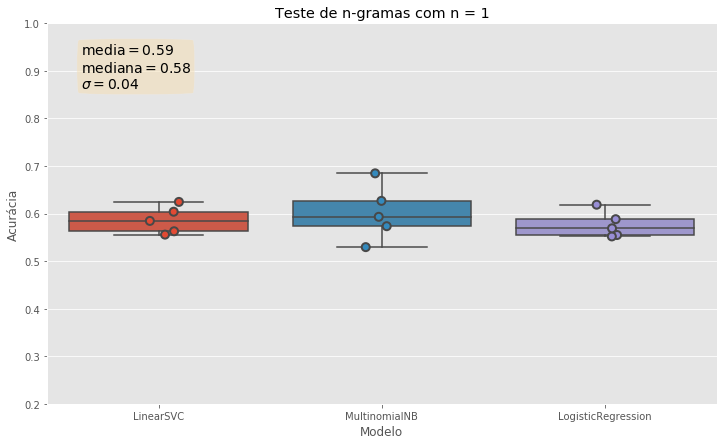

Algoritmos ordenados por ordem de acurácia média

Modelo
MultinomialNB         0.601415
LinearSVC             0.586234
LogisticRegression    0.576468
Name: Acurácia, dtype: float64


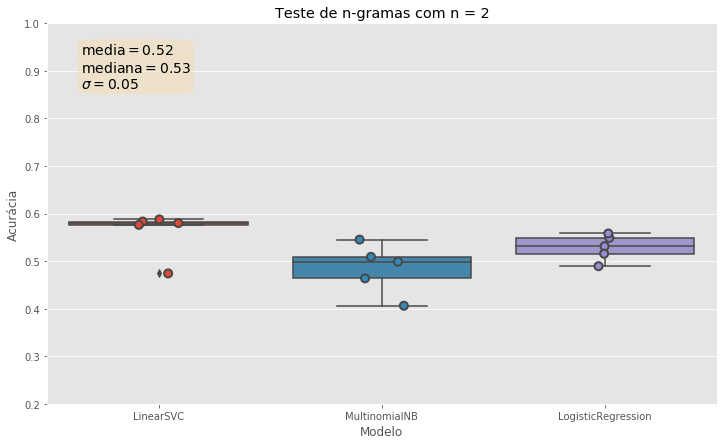

Algoritmos ordenados por ordem de acurácia média

Modelo
LinearSVC             0.560240
LogisticRegression    0.528637
MultinomialNB         0.484526
Name: Acurácia, dtype: float64


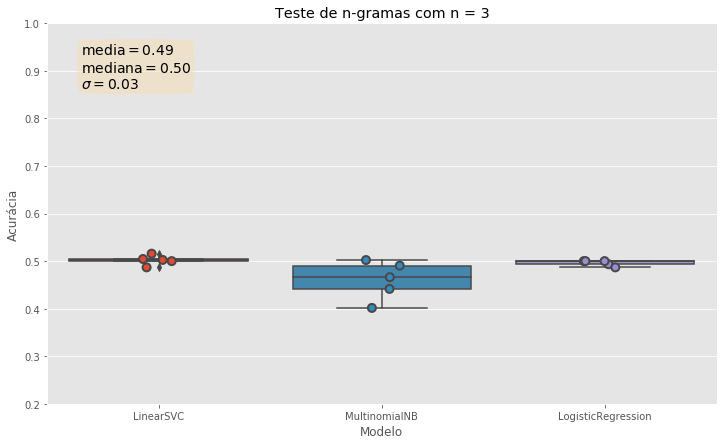

Algoritmos ordenados por ordem de acurácia média

Modelo
LinearSVC             0.501883
LogisticRegression    0.496053
MultinomialNB         0.460415
Name: Acurácia, dtype: float64


In [31]:
ngrams = [1, 2, 3]

for ngram in ngrams:

    vectorizer = CountVectorizer(
        analyzer = 'word',
        lowercase = False,
        stop_words = stopwords,
        ngram_range=(ngram, ngram)
    )

    features = vectorizer.fit_transform(clean_data)
    features_nd = features.toarray()

    features = features_nd
    labels = data_labels

    models = [
        LinearSVC(),
        MultinomialNB(),
        LogisticRegression(random_state=0),
    ]

    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []

    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='recall_macro', cv=CV)

        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))

    cv_df = pd.DataFrame(entries, columns=['Modelo', 'fold_idx', 'Acurácia'])
    
    mean = cv_df['Acurácia'].mean()
    sigma = cv_df['Acurácia'].std()
    median = cv_df['Acurácia'].median()
    
    # Plot
    fig, ax = plt.subplots(1)

    sns.boxplot(x='Modelo', y='Acurácia', data=cv_df)
    sns.stripplot(x='Modelo', y='Acurácia', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)

    textstr = '$\mathrm{media}=%.2f$\n$\mathrm{mediana}=%.2f$\n$\sigma=%.2f$'%(mean, median, sigma)
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round4', facecolor='wheat', alpha=0.5)
    
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    
    axes = plt.gca()
    axes.set_ylim([0.2,1.0])
    
    title = 'Teste de n-gramas com n = ' + str(ngram)
    
    plt.title(title)
    plt.show()

    print('Algoritmos ordenados por ordem de acurácia média')
    print()
    print(cv_df.groupby('Modelo').Acurácia.mean().sort_values(ascending=False))

Com a análise para uni, bi e tri-gramas fica claro que optar por unigramas parece uma opção mais razoável quando nos baseamos na acurácia média.

# Teste dos algoritmos com o modelo tf-idf

Utilizando unigramas, bigramas e trigramas.
Teste de 4 algoritmos diferentes para a classificação: utiliza tf-idf e validação cruzada.

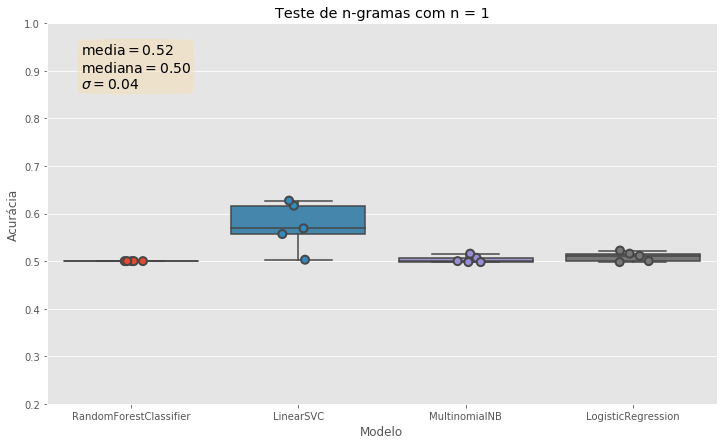

Algoritmos ordenados por ordem de acurácia média

Modelo
LinearSVC                 0.574480
LogisticRegression        0.509386
MultinomialNB             0.503713
RandomForestClassifier    0.500000
Name: Acurácia, dtype: float64


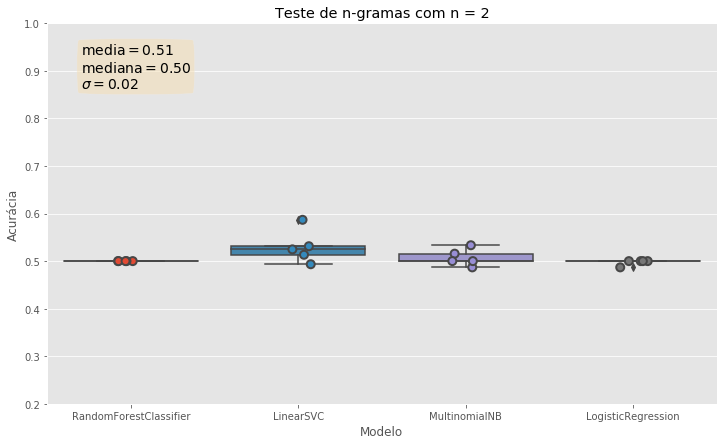

Algoritmos ordenados por ordem de acurácia média

Modelo
LinearSVC                 0.529918
MultinomialNB             0.507164
RandomForestClassifier    0.500000
LogisticRegression        0.497368
Name: Acurácia, dtype: float64


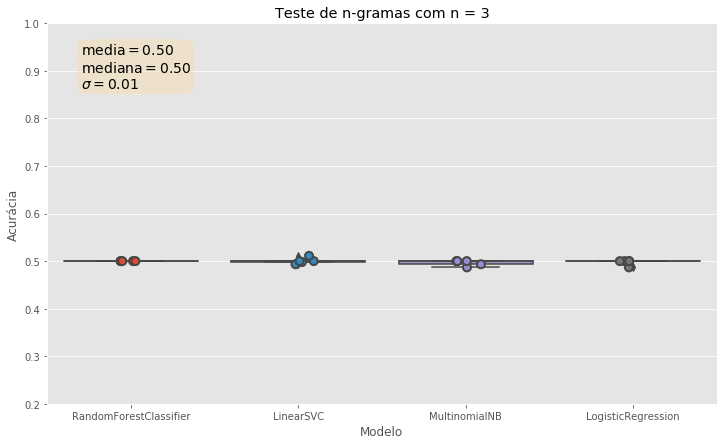

Algoritmos ordenados por ordem de acurácia média

Modelo
LinearSVC                 0.500497
RandomForestClassifier    0.500000
LogisticRegression        0.497368
MultinomialNB             0.496053
Name: Acurácia, dtype: float64


In [25]:
ngrams = [1, 2, 3]

for ngram in ngrams:

    tvec = TfidfVectorizer(analyzer='word',
                           stop_words=stopwords, 
                           ngram_range=(ngram, ngram)
    )

    features = tvec.fit_transform(clean_data)
    features_nd = features.toarray()

    features = features_nd
    labels = data_labels

    models = [
        RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
        LinearSVC(),
        MultinomialNB(),
        LogisticRegression(random_state=0),
    ]

    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []

    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='recall_macro', cv=CV)

        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))

    cv_df = pd.DataFrame(entries, columns=['Modelo', 'fold_idx', 'Acurácia'])
    
    mean = cv_df['Acurácia'].mean()
    sigma = cv_df['Acurácia'].std()
    median = cv_df['Acurácia'].median()
    
    # Plot
    fig, ax = plt.subplots(1)

    sns.boxplot(x='Modelo', y='Acurácia', data=cv_df)
    sns.stripplot(x='Modelo', y='Acurácia', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)

    textstr = '$\mathrm{media}=%.2f$\n$\mathrm{mediana}=%.2f$\n$\sigma=%.2f$'%(mean, median, sigma)
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round4', facecolor='wheat', alpha=0.5)
    
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    
    axes = plt.gca()
    axes.set_ylim([0.2,1.0])
    
    title = 'Teste de n-gramas com n = ' + str(ngram)
    
    plt.title(title)
    plt.show()

    print('Algoritmos ordenados por ordem de acurácia média')
    print()
    print(cv_df.groupby('Modelo').Acurácia.mean().sort_values(ascending=False))



## Teste de performance dos algoritmos utilizando oversampling

In [37]:
df = pd.read_csv('tweets_classificados.csv')

data = []
clean_data = []
data_labels = []

df['clean_tweet'] = df.apply(clean, args=(emojistring,), axis=1)

for index, row in df.iterrows():
    if row['review'] == 1:
        data_labels.append(1)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    elif row['review'] == -1:
        data_labels.append(0)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    else:
        pass   

vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(ngram, ngram)
)

features = vectorizer.fit_transform(clean_data)
features_nd = features.toarray()

features = features_nd
labels = data_labels

X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0
)

print('Original train dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

features, labels = ros.fit_resample(X_train, y_train)

print('Resampled whole dataset shape %s' % Counter(y_res))

X_train, X_test, y_train, y_test = train_test_split(
        X_res, 
        y_res,
        test_size=0.3
)

print('New train dataset shape %s' % Counter(y_train))

Original train dataset shape Counter({1: 272, 0: 272})
Resampled whole dataset shape Counter({1: 272, 0: 272})
New train dataset shape Counter({0: 195, 1: 185})


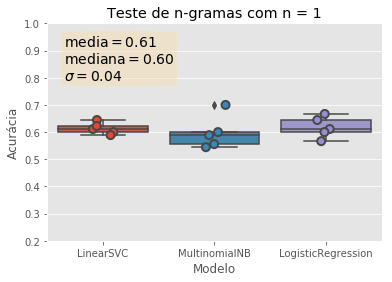

Algoritmos ordenados por ordem de acurácia média

Modelo
LogisticRegression    0.617778
LinearSVC             0.613333
MultinomialNB         0.597778
Name: Acurácia, dtype: float64


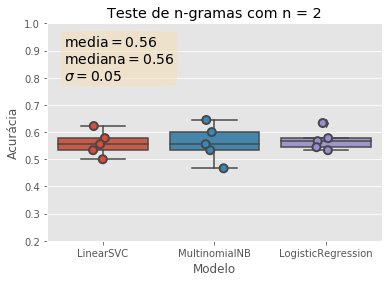

Algoritmos ordenados por ordem de acurácia média

Modelo
LogisticRegression    0.571111
MultinomialNB         0.560000
LinearSVC             0.557778
Name: Acurácia, dtype: float64


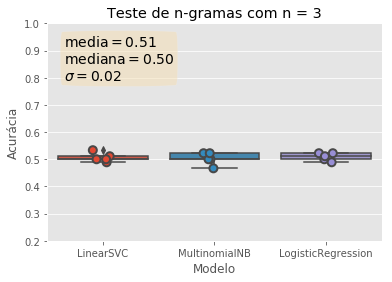

Algoritmos ordenados por ordem de acurácia média

Modelo
LogisticRegression    0.508889
LinearSVC             0.506667
MultinomialNB         0.502222
Name: Acurácia, dtype: float64


In [41]:
ngrams = [1, 2, 3]
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
    
for ngram in ngrams:

    vectorizer = CountVectorizer(
        analyzer = 'word',
        lowercase = False,
        stop_words = stopwords,
        ngram_range=(ngram, ngram)
    )

    features = vectorizer.fit_transform(clean_data)
    features_nd = features.toarray()

    features = features_nd
    labels = data_labels
    
    features, labels = rus.fit_resample(features, labels)

    models = [
        LinearSVC(),
        MultinomialNB(),
        LogisticRegression(random_state=0),
    ]

    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []

    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='recall_macro', cv=CV)

        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))

    cv_df = pd.DataFrame(entries, columns=['Modelo', 'fold_idx', 'Acurácia'])
    
    mean = cv_df['Acurácia'].mean()
    sigma = cv_df['Acurácia'].std()
    median = cv_df['Acurácia'].median()
    
    # Plot
    fig, ax = plt.subplots(1)

    sns.boxplot(x='Modelo', y='Acurácia', data=cv_df)
    sns.stripplot(x='Modelo', y='Acurácia', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)

    textstr = '$\mathrm{media}=%.2f$\n$\mathrm{mediana}=%.2f$\n$\sigma=%.2f$'%(mean, median, sigma)
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round4', facecolor='wheat', alpha=0.5)
    
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    
    axes = plt.gca()
    axes.set_ylim([0.2,1.0])
    
    title = 'Teste de n-gramas com n = ' + str(ngram)
    
    plt.title(title)
    plt.show()

    print('Algoritmos ordenados por ordem de acurácia média')
    print()
    print(cv_df.groupby('Modelo').Acurácia.mean().sort_values(ascending=False))

New dataset shape Counter({1: 268, 0: 262})


## Tunando SVM

Agora vamos tentar tunar os parâmetros do SVM linear.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0.3
)


In [9]:
model = SVC()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

/home/helfs/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

         neg       0.52      1.00      0.68        94
         pos       0.00      0.00      0.00        88

   micro avg       0.52      0.52      0.52       182
   macro avg       0.26      0.50      0.34       182
weighted avg       0.27      0.52      0.35       182

[[94  0]
 [88  0]]


/home/helfs/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/helfs/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/helfs/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
param_grid = {'C':[1,2,4,8,10],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [11]:
grid = GridSearchCV(SVC(),param_grid,refit = True)

In [12]:
grid.fit(X_train,y_train)

/home/helfs/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 2, 4, 8, 10], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
grid.best_params_

{'C': 2, 'gamma': 1, 'kernel': 'rbf'}

In [14]:
predic = grid.predict(X_test)
best_svm = grid

In [15]:
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

         neg       0.53      0.99      0.69        94
         pos       0.88      0.08      0.15        88

   micro avg       0.55      0.55      0.55       182
   macro avg       0.70      0.53      0.42       182
weighted avg       0.70      0.55      0.43       182

[[93  1]
 [81  7]]


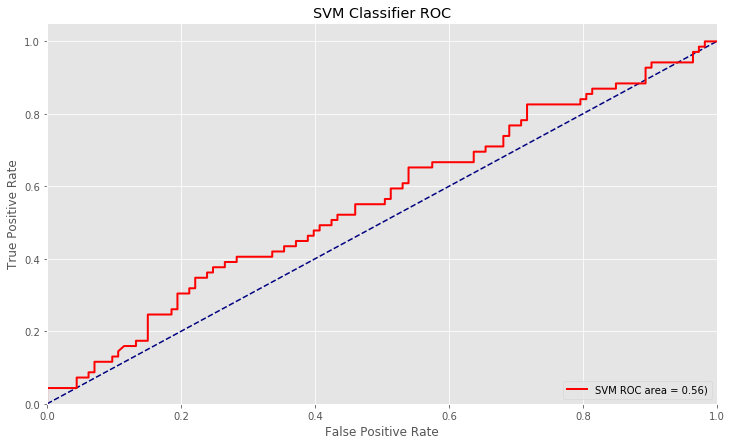

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

rbf_svc = SVC(kernel='rbf', gamma=1, C=2,probability=True)
rbf_svc_fitted = rbf_svc.fit(X_train, y_train)
predictedprobSVC = rbf_svc_fitted.predict_proba(X_test)

#GET ROC DATA
fpr, tpr, thresholds = roc_curve(y_test, predictedprobSVC[:,1])
roc_auc = auc(fpr, tpr)

#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr, tpr, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

## Tunando logit

In [ ]:
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X_train,y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
# Predict target vector
predic = best_model.predict(X_test)
best_logit = best_model

In [ ]:
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

# Naive Bayes

Naive Bayes não pode ser tunado pois não tem hiperparâmetros, usamos então o mesmo testado anteriormente.

In [ ]:
nb = MultinomialNB()
nb = nb.fit(X_train,y_train)

In [ ]:
predic = nb.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

In [ ]:
best_nb = nb

# Em resumo

Estes são os resultados para os melhores classificadores:

In [ ]:
predic = best_logit.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

In [ ]:
predic = best_svm.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

In [ ]:
predic = best_nb.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

In [ ]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item*10)))
    return a

x = np.arange(-1.0, 1.0, 0.01)
sig = sigmoid(x)

plt.title('Função sigmóide')
plt.plot(x,sig)
plt.show()

In [ ]:

from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.title('Hiperplano de margem máxima')
plt.show()

# RESAMPLING

Oversampling: aumentando a quantidade de classificações positivas e balanceando o conjunto de testes.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0
)

In [44]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler 

print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 379, 1: 225})
Resampled dataset shape Counter({0: 379, 1: 379})


In [46]:
X_train, X_test, y_train, y_test = train_test_split(
        X_res, 
        y_res,
        test_size=0.3
)

In [47]:
print('New dataset shape %s' % Counter(y_train))

New dataset shape Counter({1: 268, 0: 262})


In [48]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=0)
grid.fit(X_train, y_train)

/home/helfs/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 2, 4, 8, 10], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [50]:
predic = grid.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       117
           1       0.97      0.59      0.74       111

   micro avg       0.79      0.79      0.79       228
   macro avg       0.84      0.79      0.78       228
weighted avg       0.84      0.79      0.79       228

[[115   2]
 [ 45  66]]


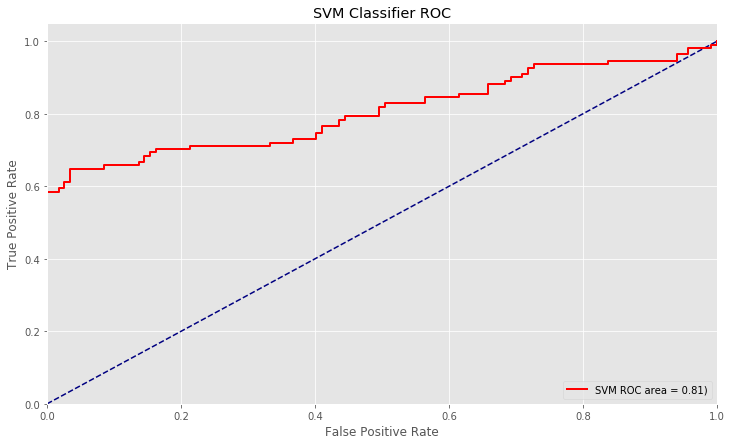

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

rbf_svc = SVC(kernel='rbf', gamma=1, C=1,probability=True)
rbf_svc_fitted = rbf_svc.fit(X_train, y_train)
predictedprobSVC = rbf_svc_fitted.predict_proba(X_test)

#GET ROC DATA
fpr, tpr, thresholds = roc_curve(y_test, predictedprobSVC[:,1])
roc_auc = auc(fpr, tpr)

#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr, tpr, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [ ]:
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X_train,y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
# Predict target vector
predic = best_model.predict(X_test)
best_logit = best_model
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

In [ ]:
y_score.shape

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
nb = MultinomialNB()
nb = nb.fit(X_train,y_train)
predic = nb.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

# UNDERSAMPLING

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0
)

In [53]:
print('Original dataset shape %s' % Counter(y_train))

ros = RandomUnderSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 379, 1: 225})
Resampled dataset shape Counter({0: 225, 1: 225})


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
        X_res, 
        y_res,
        test_size=0.3
)

In [47]:
print('New dataset shape %s' % Counter(y_train))

New dataset shape Counter({1: 268, 0: 262})


## SVM com undersample

In [55]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=0)
grid.fit(X_train, y_train)

/home/helfs/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/helfs/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 2, 4, 8, 10], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
grid.best_params_

{'C': 4, 'gamma': 0.1, 'kernel': 'rbf'}

In [58]:
predic = grid.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.47      0.73      0.57        55
           1       0.69      0.42      0.53        80

   micro avg       0.55      0.55      0.55       135
   macro avg       0.58      0.58      0.55       135
weighted avg       0.60      0.55      0.54       135

[[40 15]
 [46 34]]


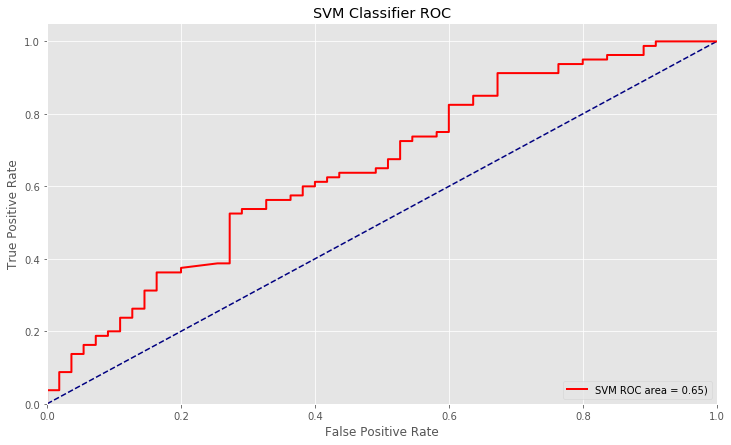

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

rbf_svc = SVC(kernel='rbf', gamma=0.1, C=4,probability=True)
rbf_svc_fitted = rbf_svc.fit(X_train, y_train)
predictedprobSVC = rbf_svc_fitted.predict_proba(X_test)

#GET ROC DATA
fpr, tpr, thresholds = roc_curve(y_test, predictedprobSVC[:,1])
roc_auc = auc(fpr, tpr)

#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr, tpr, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

# FINAL!!!!!!!!!!!!!!!!!!!!

# CASO BÁSICO

In [47]:
df = pd.read_csv('tweets_classificados.csv')

data = []
clean_data = []
data_labels = []

df['clean_tweet'] = df.apply(clean, args=(emojistring,), axis=1)

for index, row in df.iterrows():
    if row['review'] == 1:
        data_labels.append(1)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    elif row['review'] == -1:
        data_labels.append(0)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    else:
        pass   

vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(1, 1)
)

features = vectorizer.fit_transform(clean_data)
features_nd = features.toarray()

features = features_nd
labels = data_labels

X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0.25
)

## OTIMIZAÇÃO DOS ALGORITMOS

### SVM

In [48]:
param_grid = {'C':[1,2,4,8,10],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'C': 2, 'gamma': 1, 'kernel': 'rbf'}


In [60]:
# Agora instanciamos outro SVM usando os dados do grid search para obter a curva ROC e o valor AUC
# Dessa forma é mais rápido 

svm = SVC(kernel='rbf', gamma=1, C=2, probability=True)
svm_fitted = svm.fit(X_train, y_train)
predictedprobSVM = svm_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, predictedprobSVM[:,1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [61]:
svm_predicted = svm_fitted.predict(X_test)

print(classification_report(y_test, svm_predicted))
print(confusion_matrix(y_test, svm_predicted))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        87
           1       1.00      0.05      0.09        64

   micro avg       0.60      0.60      0.60       151
   macro avg       0.79      0.52      0.41       151
weighted avg       0.76      0.60      0.46       151

[[87  0]
 [61  3]]


## Tunando logit

In [69]:
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
logit_fitted = clf.fit(X_train,y_train)

# View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])

In [70]:
predictedproblogit = logit_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, predictedproblogit[:,1])
roc_auc_logit = auc(fpr_logit, tpr_logit)

In [82]:
# Predict target vector
logit_predicted = best_model.predict(X_test)
print(classification_report(y_test, logit_predicted))
# print(confusion_matrix(y_test, logit_predicted))

              precision    recall  f1-score   support

           0       0.60      0.78      0.68        87
           1       0.49      0.28      0.36        64

   micro avg       0.57      0.57      0.57       151
   macro avg       0.54      0.53      0.52       151
weighted avg       0.55      0.57      0.54       151



# Naive Bayes

Naive Bayes não pode ser tunado pois não tem hiperparâmetros, usamos então o mesmo testado anteriormente.

In [77]:
nb = MultinomialNB()
nb_fitted = nb.fit(X_train, y_train)

In [78]:
predictedprobnb = nb_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, predictedprobnb[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

In [83]:
predic = nb.predict(X_test)
print(classification_report(y_test,predic))
# print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64        87
           1       0.49      0.42      0.45        64

   micro avg       0.57      0.57      0.57       151
   macro avg       0.55      0.55      0.55       151
weighted avg       0.56      0.57      0.56       151



## Gráfico com as curvas ROC

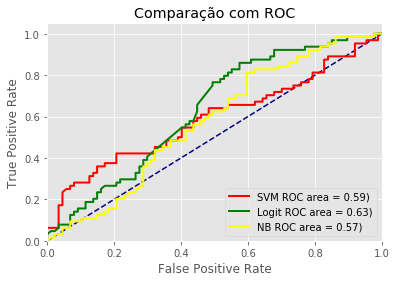

In [81]:
# Grafico final
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_logit, tpr_logit, color='green', lw=2, label='Logit ROC area = %0.2f)' % roc_auc_logit)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='NB ROC area = %0.2f)' % roc_auc_nb)

plt.legend(loc="lower right")
plt.title('Comparação com ROC')

plt.show()

# COM OVERSAMPLING

In [84]:
df = pd.read_csv('tweets_classificados.csv')

data = []
clean_data = []
data_labels = []

df['clean_tweet'] = df.apply(clean, args=(emojistring,), axis=1)

for index, row in df.iterrows():
    if row['review'] == 1:
        data_labels.append(1)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    elif row['review'] == -1:
        data_labels.append(0)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    else:
        pass   

vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(1, 1)
)

features = vectorizer.fit_transform(clean_data)

features = features.toarray()
labels = data_labels

ros = RandomOverSampler(random_state=42)
features, labels = ros.fit_resample(features, labels)

X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0.25
)

## OTIMIZAÇÃO DOS ALGORITMOS

### SVM

In [85]:
param_grid = {'C':[1,2,4,8,10],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'C': 8, 'gamma': 0.1, 'kernel': 'rbf'}


In [86]:
# Agora instanciamos outro SVM usando os dados do grid search para obter a curva ROC e o valor AUC
# Dessa forma é mais rápido 

svm = SVC(kernel='rbf', gamma=0.1, C=8, probability=True)
svm_fitted = svm.fit(X_train, y_train)
predictedprobSVM = svm_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, predictedprobSVM[:,1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [87]:
svm_predicted = svm_fitted.predict(X_test)

print(classification_report(y_test, svm_predicted))
print(confusion_matrix(y_test, svm_predicted))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        97
           1       0.80      0.71      0.75        93

   micro avg       0.77      0.77      0.77       190
   macro avg       0.78      0.77      0.77       190
weighted avg       0.78      0.77      0.77       190

[[81 16]
 [27 66]]


## Tunando logit

In [88]:
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
logit_fitted = clf.fit(X_train,y_train)

# View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])

In [89]:
predictedproblogit = logit_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, predictedproblogit[:,1])
roc_auc_logit = auc(fpr_logit, tpr_logit)

In [90]:
# Predict target vector
logit_predicted = best_model.predict(X_test)
print(classification_report(y_test, logit_predicted))
# print(confusion_matrix(y_test, logit_predicted))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        97
           1       0.93      0.73      0.82        93

   micro avg       0.84      0.84      0.84       190
   macro avg       0.86      0.84      0.84       190
weighted avg       0.86      0.84      0.84       190



# Naive Bayes

Naive Bayes não pode ser tunado pois não tem hiperparâmetros, usamos então o mesmo testado anteriormente.

In [91]:
nb = MultinomialNB()
nb_fitted = nb.fit(X_train, y_train)

In [92]:
predictedprobnb = nb_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, predictedprobnb[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

In [93]:
predic = nb.predict(X_test)
print(classification_report(y_test,predic))
# print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.84      0.67      0.75        97
           1       0.72      0.87      0.79        93

   micro avg       0.77      0.77      0.77       190
   macro avg       0.78      0.77      0.77       190
weighted avg       0.78      0.77      0.77       190



## Gráfico com as curvas ROC

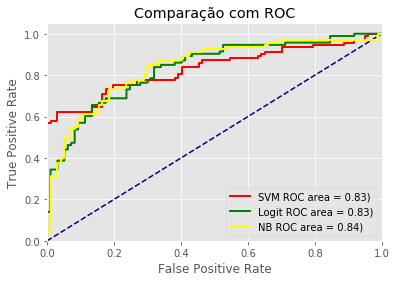

In [94]:
# Grafico final
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_logit, tpr_logit, color='green', lw=2, label='Logit ROC area = %0.2f)' % roc_auc_logit)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='NB ROC area = %0.2f)' % roc_auc_nb)

plt.legend(loc="lower right")
plt.title('Comparação com ROC')

plt.show()

Para o caso utilizando oversampling, Naive Bayes parece é o que performa melhor observando a área sobre a curva de recepção dos classificadores.

# COM UNDERSAMPLING

In [95]:
df = pd.read_csv('tweets_classificados.csv')

data = []
clean_data = []
data_labels = []

df['clean_tweet'] = df.apply(clean, args=(emojistring,), axis=1)

for index, row in df.iterrows():
    if row['review'] == 1:
        data_labels.append(1)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    elif row['review'] == -1:
        data_labels.append(0)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    else:
        pass   

vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(1, 1)
)

features = vectorizer.fit_transform(clean_data)

features = features.toarray()
labels = data_labels

rus = RandomUnderSampler(random_state=42)
features, labels = rus.fit_resample(features, labels)

X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0.25
)

## OTIMIZAÇÃO DOS ALGORITMOS

### SVM

In [96]:
param_grid = {'C':[1,2,4,8,10],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [106]:
# Agora instanciamos outro SVM usando os dados do grid search para obter a curva ROC e o valor AUC
# Dessa forma é mais rápido 

svm = SVC(kernel='rbf', gamma=0.1, C=1, probability=True)
svm_fitted = svm.fit(X_train, y_train)
predictedprobSVM = svm_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, predictedprobSVM[:,1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [107]:
svm_predicted = svm_fitted.predict(X_test)

print(classification_report(y_test, svm_predicted))
print(confusion_matrix(y_test, svm_predicted))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59        61
           1       0.55      0.65      0.60        52

   micro avg       0.59      0.59      0.59       113
   macro avg       0.60      0.60      0.59       113
weighted avg       0.60      0.59      0.59       113

[[33 28]
 [18 34]]


## Tunando logit

In [99]:
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
logit_fitted = clf.fit(X_train,y_train)

# View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])

In [100]:
predictedproblogit = logit_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, predictedproblogit[:,1])
roc_auc_logit = auc(fpr_logit, tpr_logit)

In [101]:
# Predict target vector
logit_predicted = best_model.predict(X_test)
print(classification_report(y_test, logit_predicted))
# print(confusion_matrix(y_test, logit_predicted))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        61
           1       0.89      0.79      0.84        52

   micro avg       0.86      0.86      0.86       113
   macro avg       0.86      0.85      0.86       113
weighted avg       0.86      0.86      0.86       113



# Naive Bayes

Naive Bayes não pode ser tunado pois não tem hiperparâmetros, usamos então o mesmo testado anteriormente.

In [102]:
nb = MultinomialNB()
nb_fitted = nb.fit(X_train, y_train)

In [103]:
predictedprobnb = nb_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, predictedprobnb[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

In [104]:
predic = nb.predict(X_test)
print(classification_report(y_test,predic))
# print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.62      0.51      0.56        61
           1       0.52      0.63      0.57        52

   micro avg       0.57      0.57      0.57       113
   macro avg       0.57      0.57      0.57       113
weighted avg       0.58      0.57      0.57       113



## Gráfico com as curvas ROC

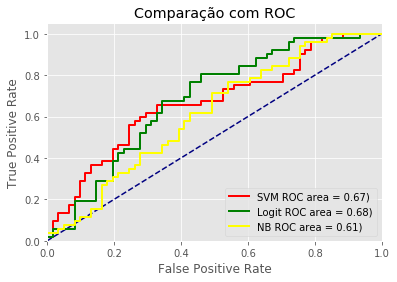

In [108]:
# Grafico final
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_logit, tpr_logit, color='green', lw=2, label='Logit ROC area = %0.2f)' % roc_auc_logit)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='NB ROC area = %0.2f)' % roc_auc_nb)

plt.legend(loc="lower right")
plt.title('Comparação com ROC')

plt.show()